# CLUSTERS Data set

Create 4 clusters of 1000 samples, Encode 2 clusters with the label 0 et 2 others with the label 1.
Classify the data set with a NNClassifier. Second, after encode each clusters with one unique label, classify the data with the same model NNClassifier.

In [1]:
#import library:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
#create the Neural Network and evaluate it:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report ,accuracy_score
#display graphically the clusters:
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
 

Create the dataset with 4 clusters for a classifier, the clusters has label: A=0, B=1, C=0, D=1

In [2]:
q=0.6

A = pd.DataFrame()
B = pd.DataFrame()
C = pd.DataFrame()
D = pd.DataFrame()

A['x']= [random.uniform(0, 1)-q for x in range (0,1000)]
A['y']= [random.uniform(0, 1)+q for x in range (0,1000)]
A['label']= 0

B['x']= [random.uniform(0, 1)+q for x in range (0,1000)]
B['y']= [random.uniform(0, 1)+q for x in range (0,1000)]
B['label']= 1

C['x']= [random.uniform(0, 1)+q for x in range (0,1000)]
C['y']= [random.uniform(0, 1)-q for x in range (0,1000)]
C['label']= 0

D['x']= [random.uniform(0, 1)-q for x in range (0,1000)]
D['y']= [random.uniform(0, 1)-q for x in range (0,1000)]
D['label']= 1

print(A.head())
print(B.head())

          x         y  label
0  0.137684  1.531000      0
1 -0.484139  0.649820      0
2 -0.282174  0.653242      0
3 -0.167760  0.860999      0
4 -0.346189  1.516157      0
          x         y  label
0  0.617303  0.618480      1
1  0.879420  1.367040      1
2  1.183464  1.420827      1
3  0.699210  1.382720      1
4  1.151326  1.199806      1


plot the four Clusters with their labels

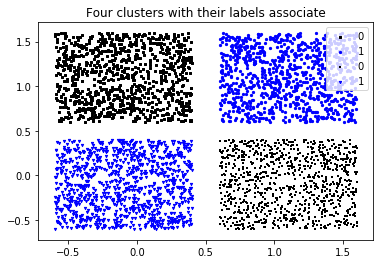

In [3]:
#plot the data set generate:
x = range(-2, 2)
y = range(-2,2)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(A['x'],A['y'], s=5, c='black', marker="s", label='0')
ax1.scatter(B['x'],B['y'], s=5, c='blue', marker="o", label='1')
ax1.scatter(C['x'],C['y'], s=5, c='black', marker="+", label='0')
ax1.scatter(D['x'],D['y'], s=5, c='blue', marker="v", label='1')
plt.title('Four clusters with their labels associate')
plt.legend(loc='upper right')
plt.show()

create a dataset with the 4 clusters for  training the model

In [4]:
#concatenate the 4 clusters in one data frame:
df=pd.concat([A,B,C,D])
#create the training data y_trn with only the label column:
y_trn=df['label']
#create the training data X_trn with the values of the data without the label column:
X_trn=df.drop('label', axis = 1)
print(df.head())
print(y_trn.shape)
print(y_trn.shape)

          x         y  label
0  0.137684  1.531000      0
1 -0.484139  0.649820      0
2 -0.282174  0.653242      0
3 -0.167760  0.860999      0
4 -0.346189  1.516157      0
(4000,)
(4000,)


Split the pandas dataframes X_trn, y_trn into random X_train and X_test subsets with 80% of data for training and 20% of data for testing the model.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_trn, y_trn, test_size = 0.2, random_state=420)
print(X_train.shape)
print(X_test.shape)

(3200, 2)
(800, 2)


MLPClassifier implements a multi-layer perceptron (MLP) supports multi-class classification by applying Softmax as the output function.
Further, the model supports multi-label classification in which a sample can belong to more than one class, I choose 1 hidden layer of 5 neurons, I choose the activation 'relu':the rectified linear unit function, returns f(x) = max(0, x) and the solver 'lbfgs':is an optimizer in the family of quasi-Newton methods , With these parameters for the data, the model converge easily to the minimum.

In [6]:
model = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-8,hidden_layer_sizes=(5), random_state=1)
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-08, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Evaluate the model with predictions:

In [7]:
predictions=model.predict(X_test)
#predictions

I use SciKit-Learn’s built in metrics with a classification report, accuracy score to evaluate how well the model performed.

In [8]:
#classification report:
print(classification_report(y_test,predictions))
print("#####################################################")
#accuracy score:
print('The score is {}'.format(accuracy_score(y_test,predictions, normalize=True)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       404
          1       1.00      1.00      1.00       396

avg / total       1.00      1.00      1.00       800

#####################################################
The score is 1.0


The model has an accuracy score of 100%, he predict well all the values of y_test without error.
with less than 5 hidden layers the model don't converge correctly and the accuracy is low.



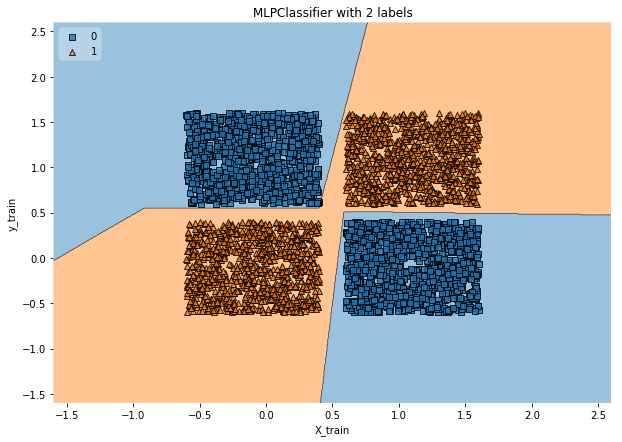

In [9]:
#display the classified data:
plt.figure(figsize=(10,7))
#the data must be in an array format for the plot
X_trn=np.array(X_trn)
y_trn=np.array(y_trn)
plot_decision_regions(X_trn, y_trn, clf=model, legend=2)
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('MLPClassifier with 2 labels')
plt.show()

The model classifies very well the values with their 2 labels associate.

# Encode the 4 clusters for a new classifier


each cluster has a unique label: A1=0, B1=1, C1=2, D1=3

In [10]:
q=0.6

A1 = pd.DataFrame()
B1 = pd.DataFrame()
C1 = pd.DataFrame()
D1 = pd.DataFrame()

A1['x']= [random.uniform(0, 1)-q for x in range (0,1000)]
A1['y']= [random.uniform(0, 1)+q for x in range (0,1000)]
A1['label']= 0

B1['x']= [random.uniform(0, 1)+q for x in range (0,1000)]
B1['y']= [random.uniform(0, 1)+q for x in range (0,1000)]
B1['label']= 1

C1['x']= [random.uniform(0, 1)+q for x in range (0,1000)]
C1['y']= [random.uniform(0, 1)-q for x in range (0,1000)]
C1['label']= 2

D1['x']= [random.uniform(0, 1)-q for x in range (0,1000)]
D1['y']= [random.uniform(0, 1)-q for x in range (0,1000)]
D1['label']= 3

#concatenate the 4 clusters in one data frame:
df1=pd.concat([A1,B1,C1,D1])
df1.head()

,x,y,label
0,-0.411124,1.437749,0
1,0.322544,1.514712,0
2,-0.343675,0.631099,0
3,0.087779,1.520690,0
4,-0.057688,1.065671,0


create the training samples for the new model1

In [11]:
#create the dataframes y_tr with only the label column:
y_tr=df1['label']
#create the dataframes X_tr with the values of the data without the label column:
X_tr=df1.drop('label', axis = 1)
#Split the pandas dataframes X_tr, y_tr into X_train1 (80% of data) and X_test1(20% of data) subsets:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_tr, y_tr, test_size = 0.2, random_state=420)
print(X_train1.shape)
print(X_test1.shape)

(3200, 2)
(800, 2)


I use exactly the same model with the same parameters to classify the new 4 clusters

In [12]:
model1 = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-8,hidden_layer_sizes=(5), random_state=1)
model1.fit(X_train1, y_train1)

MLPClassifier(activation='relu', alpha=1e-08, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [13]:
#Evaluate the model with predictions:
predictions1=model1.predict(X_test1)
#predictions1

In [14]:
#classification report:
print(classification_report(y_test1,predictions1))
print("###################################################")
#accuracy score:
print('The score is {}'.format(accuracy_score(y_test1,predictions1, normalize=True)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       199
          1       1.00      1.00      1.00       201
          2       1.00      1.00      1.00       205
          3       1.00      1.00      1.00       195

avg / total       1.00      1.00      1.00       800

###################################################
The score is 1.0


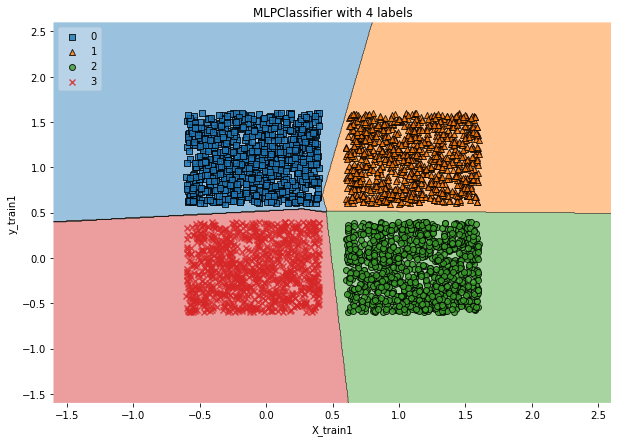

In [15]:
plt.figure(figsize=(10,7))
#the data must be in an array format for the plot
X_tr=np.array(X_tr)
y_tr=np.array(y_tr)
plot_decision_regions(X_tr, y_tr, clf=model1, legend=2)
plt.xlabel('X_train1')
plt.ylabel('y_train1')
plt.title('MLPClassifier with 4 labels')
plt.show()

The same model predict and classifies very well the data with 4 differents labels, only 5 hidden layers are needed to obtain a accuracy score of 100%.

# DEBUGGING ALGORITHM:

#  with learning curves

this diagnostic tools, can help us to improve the performance of a learning algorithm.
By plotting the model training and validation accuracies as functions of the training set size, we can easily detect whether the model suffers from high variance or high bias.

In [16]:
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr=make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state=1))


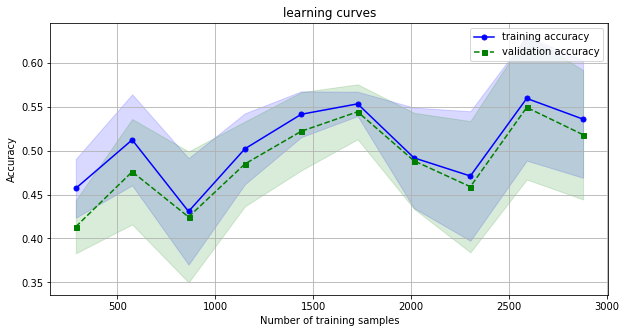

In [17]:
train_sizes, train_scores, test_scores=learning_curve(estimator=pipe_lr,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=1)

train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.figure(figsize=(10,5))
#calculate the average accuracies from the returned cross-validated training scores for the different size of the training set
plt.plot(train_sizes,train_mean,color='b',marker='o',markersize=5,label='training accuracy')
#variance of the estimate:standard deviation of the training average accuracy 
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')
#calculate the average accuracies from the returned cross-validated test scores for the different size of the training set
plt.plot(train_sizes, test_mean, color='green',linestyle='--', marker='s',markersize=5,label='validation accuracy')
#variance of the estimate:standard deviation of the validation average accuracy 
plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std,alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.title('learning curves')
plt.show()

the model has a good bias-variance trade off.

#  Estimate the performance of the classifier:

# Validation curves 

Validation curves are useful for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as funcions of the sample size, we vary the values of the model parameters. for example the inverse regularization parameter C in logisticRegression.

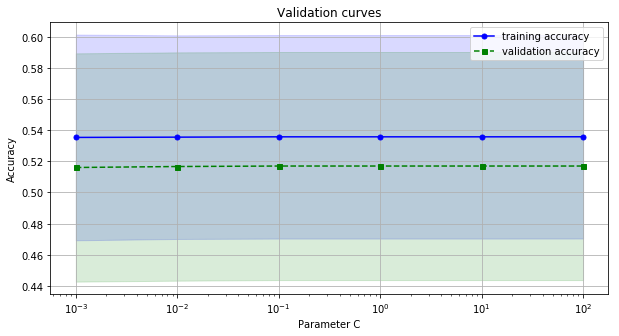

In [18]:
from sklearn.model_selection import validation_curve

param_range=[0.001,0.01,0.1,1.0,10.0,100.0]
train_scores, test_scores=validation_curve(estimator=pipe_lr,X=X_train,y=y_train,param_name='logisticregression__C',cv=10,param_range=param_range)

train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.figure(figsize=(10,5))

plt.plot(param_range,train_mean,color='b',marker='o',markersize=5,label='training accuracy') 
plt.fill_between(param_range,train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green',linestyle='--', marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean + test_std, test_mean - test_std,alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='upper right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.title('Validation curves')
plt.show()

the validation curves function uses stratified k-fold cross-validation by default to estimate the performance of the classifier. i evaluate the parameter C the inverse regularization parameter. the model fit well the data without overfitting or underfitting